In [37]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import platform
import pca_functions as pcafunc
import warnings
from event_utils import get_events
from create_stim_table import create_stim_df
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# This patch of code just ensures we get an easy to read font size for the duration of the notebook
import matplotlib
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

In [38]:
# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

In [39]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

# Create data cache object 
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [40]:
desired_container_id = 682734790

In [41]:
# Drifting gratings

In [42]:
response1, response2, response3, dg1_responses_by_stimulus, dg2_responses_by_stimulus, dg3_responses_by_stimulus = pcafunc.get_all_relevant_tables_dg_sg_ns(desired_container_id, "drifting_gratings", boc)

In [43]:
mean_response1, mean_response2, mean_response3 = pcafunc.get_mean_matrices_dg_sg_ns(dg1_responses_by_stimulus, dg2_responses_by_stimulus, dg3_responses_by_stimulus)

In [44]:
transformed_data_pca, pca_results_dg = pcafunc.pca_transform_data(mean_response1, mean_response2, mean_response3, 12)

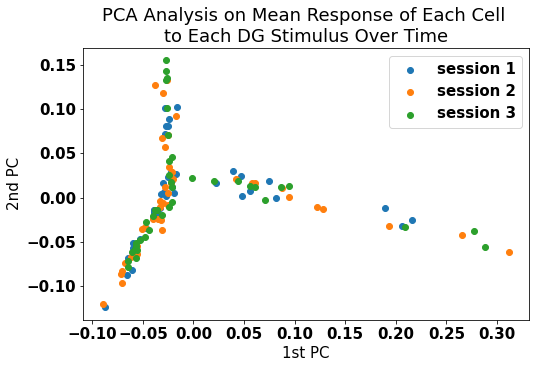

In [45]:
# PCA Model: 2D Visualization
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][0], transformed_data_pca[transformed_data_pca.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][0], transformed_data_pca[transformed_data_pca.Session=="2"][1], label="session 2")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="3"][0], transformed_data_pca[transformed_data_pca.Session=="3"][1], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each DG Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_drifting_gratings_pc12.jpg", dpi=200)
plt.show()


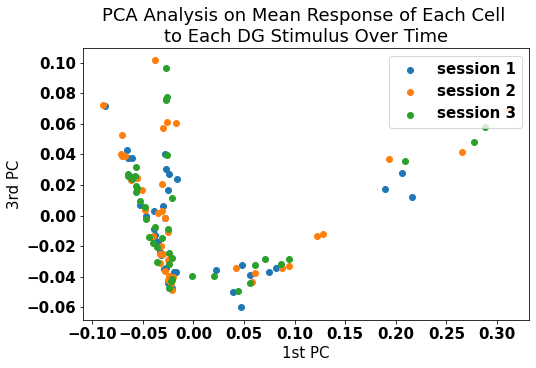

In [46]:
# PCA Model: 2D Visualization, PCs 1 and 3
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][0], transformed_data_pca[transformed_data_pca.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][0], transformed_data_pca[transformed_data_pca.Session=="2"][2], label="session 2")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="3"][0], transformed_data_pca[transformed_data_pca.Session=="3"][2], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("3rd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each DG Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_drifting_gratings_pc13.jpg", dpi=200)
plt.show()


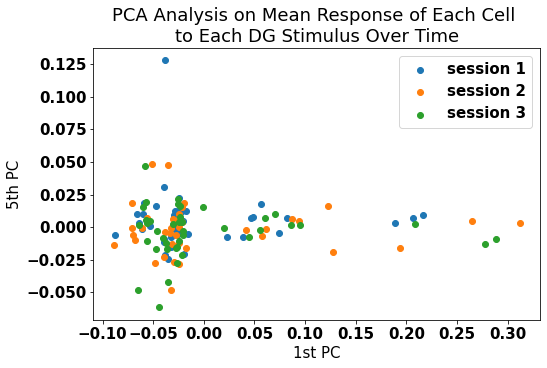

In [47]:
# PCA Model: 2D Visualization, PCs 1 and 4
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][0], transformed_data_pca[transformed_data_pca.Session=="1"][4], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][0], transformed_data_pca[transformed_data_pca.Session=="2"][4], label="session 2")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="3"][0], transformed_data_pca[transformed_data_pca.Session=="3"][4], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("5th PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each DG Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_drifting_gratings_pc15.jpg", dpi=200)
plt.show()


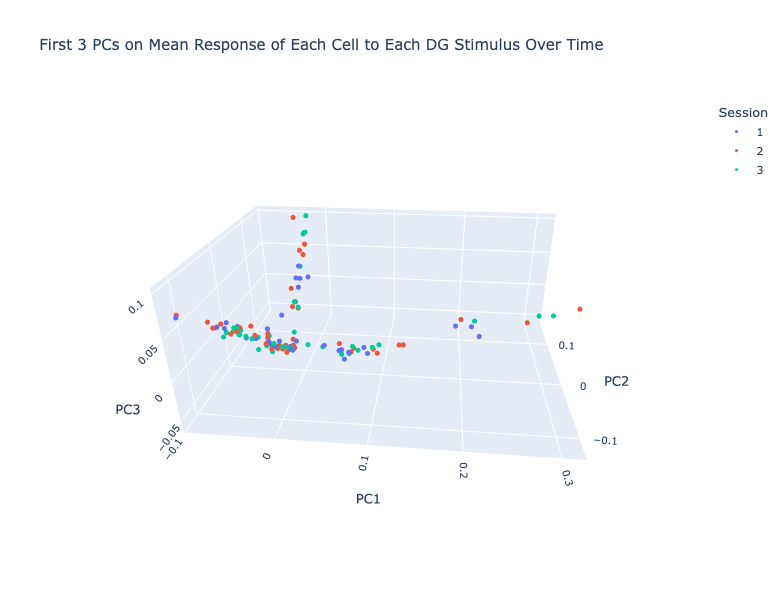

In [48]:
# PCA Model: 3D Visualization
fig = px.scatter_3d(transformed_data_pca, x=0, y=1, z=2, color="Session", labels = {"0": "PC1","1": "PC2", "2": "PC3"}, title = "First 3 PCs on Mean Response of Each Cell to Each DG Stimulus Over Time")
fig.update_traces(marker_size=3) # reduce size of scatter points from default size
fig.update_layout(width=800, height=600, font_size=11, scene_aspectmode="data", scene_camera_eye= dict(x=0.2, y=-2.0, z=1)) # adjust plot appearance
fig.show()

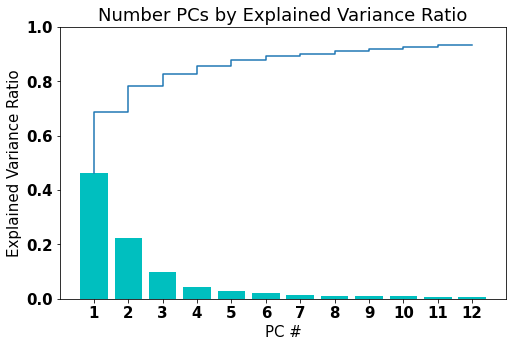

In [49]:
fig = plt.subplots(figsize=(8,5))
for i in range(1,13):
    plt.bar(i, pca_results_dg.explained_variance_ratio[0][i-1], color="c")
plt.step(range(1,13), np.cumsum(pca_results_dg.explained_variance_ratio[0]))
plt.ylim([0,1])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Number PCs by Explained Variance Ratio")
plt.xlabel("PC #")
plt.ylabel("Explained Variance Ratio")
plt.savefig(f"../{desired_container_id}_dg_pca_explained_variance.jpg", dpi=200)
plt.show()

In [50]:
# Static gratings

In [51]:
# Get response matrics
response1, response2, response3, sg1_responses_by_stimulus, sg2_responses_by_stimulus, sg3_responses_by_stimulus = pcafunc.get_all_relevant_tables_dg_sg_ns(desired_container_id, "static_gratings", boc)

In [52]:
# Transform data for PCA n=3
mean_response1, mean_response2, mean_response3 = pcafunc.get_mean_matrices_dg_sg_ns(sg1_responses_by_stimulus, sg2_responses_by_stimulus, sg3_responses_by_stimulus)
transformed_data_sg, pca_results_sg = pcafunc.pca_transform_data(mean_response1, mean_response2, mean_response3, 3)

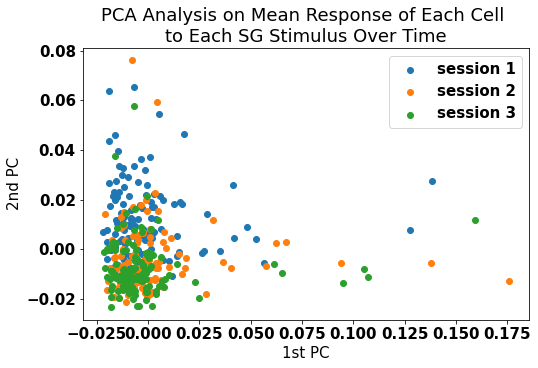

In [53]:
# PCA Model: 2D Visualization, PC1 and 2
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_sg[transformed_data_sg.Session=="1"][0], transformed_data_sg[transformed_data_sg.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_sg[transformed_data_sg.Session=="2"][0], transformed_data_sg[transformed_data_sg.Session=="2"][1], label="session 2")
ax.scatter(transformed_data_sg[transformed_data_sg.Session=="3"][0], transformed_data_sg[transformed_data_sg.Session=="3"][1], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each SG Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_static_gratings_pc12.jpg", dpi=200)
plt.show()


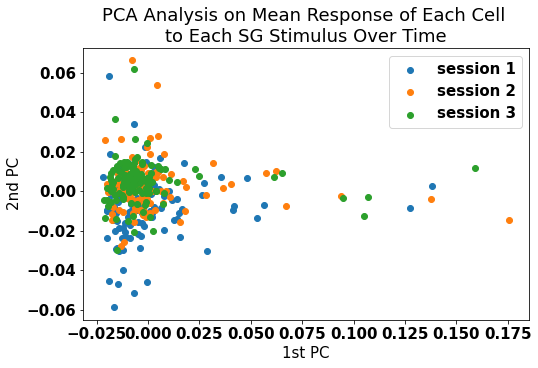

In [54]:
# PCA Model: 2D Visualization, PC1 and 3
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_sg[transformed_data_sg.Session=="1"][0], transformed_data_sg[transformed_data_sg.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_sg[transformed_data_sg.Session=="2"][0], transformed_data_sg[transformed_data_sg.Session=="2"][2], label="session 2")
ax.scatter(transformed_data_sg[transformed_data_sg.Session=="3"][0], transformed_data_sg[transformed_data_sg.Session=="3"][2], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each SG Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_static_gratings_pc13.jpg", dpi=200)
plt.show()


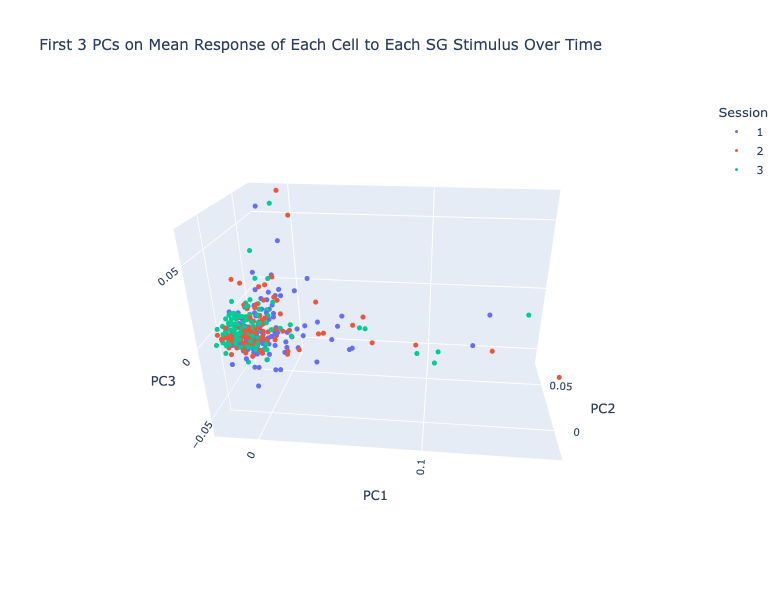

In [55]:
# PCA Model: 3D Visualization
fig = px.scatter_3d(transformed_data_sg, x=0, y=1, z=2, color="Session", labels = {"0": "PC1","1": "PC2", "2": "PC3"}, title = "First 3 PCs on Mean Response of Each Cell to Each SG Stimulus Over Time")
fig.update_traces(marker_size=3) # reduce size of scatter points from default size
fig.update_layout(width=800, height=600, font_size=11, scene_aspectmode="data", scene_camera_eye= dict(x=0.2, y=-2.0, z=1)) # adjust plot appearance
fig.show()

In [56]:
# Natural Scenes

In [57]:
# Get response matrics
response1, response2, response3, ns1_responses_by_stimulus, ns2_responses_by_stimulus, ns3_responses_by_stimulus = pcafunc.get_all_relevant_tables_dg_sg_ns(desired_container_id, "natural_scenes", boc)

In [58]:
# Transform data for PCA n=3
mean_response1_ns, mean_response2_ns, mean_response3_ns = pcafunc.get_mean_matrices_dg_sg_ns(ns1_responses_by_stimulus, ns2_responses_by_stimulus, ns3_responses_by_stimulus)
transformed_data_ns, pca_results_ns = pcafunc.pca_transform_data(mean_response1_ns, mean_response2_ns, mean_response3_ns, 3)

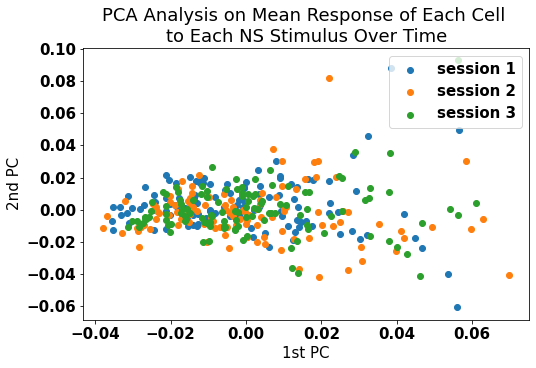

In [59]:
# PCA Model: 2D Visualization, PCs 1 and 2
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_ns[transformed_data_ns.Session=="1"][0], transformed_data_ns[transformed_data_ns.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_ns[transformed_data_ns.Session=="2"][0], transformed_data_ns[transformed_data_ns.Session=="2"][1], label="session 2")
ax.scatter(transformed_data_ns[transformed_data_ns.Session=="3"][0], transformed_data_ns[transformed_data_ns.Session=="3"][1], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each NS Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig("")
plt.savefig(f"../results/{desired_container_id}_pca_natural_scenes_pc12.jpg", dpi=200)
plt.show()


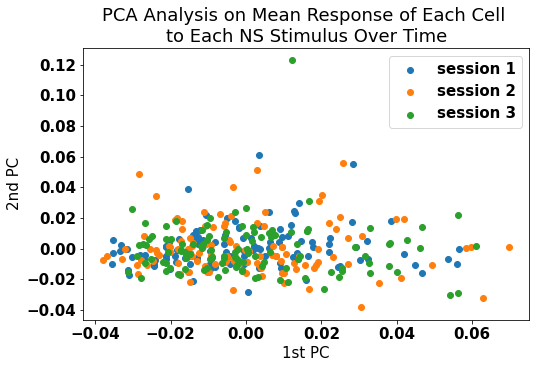

In [60]:
# PCA Model: 2D Visualization, PCs 1 and 3
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_ns[transformed_data_ns.Session=="1"][0], transformed_data_ns[transformed_data_ns.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_ns[transformed_data_ns.Session=="2"][0], transformed_data_ns[transformed_data_ns.Session=="2"][2], label="session 2")
ax.scatter(transformed_data_ns[transformed_data_ns.Session=="3"][0], transformed_data_ns[transformed_data_ns.Session=="3"][2], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell \nto Each NS Stimulus Over Time")
plt.legend(loc="upper right")
plt.savefig("")
plt.savefig(f"../results/{desired_container_id}_pca_natural_scenes_pc13.jpg", dpi=200)
plt.show()


In [61]:
# PCA Model: 3D Visualization
fig = px.scatter_3d(transformed_data_ns, x=0, y=1, z=2, color="Session", labels = {"0": "PC1","1": "PC2", "2": "PC3"}, title = "First 3 PCs on Mean Response of Each Cell to Each NS Stimulus Over Time")
fig.update_traces(marker_size=3) # reduce size of scatter points from default size
fig.update_layout(width=800, height=600, font_size=11, scene_aspectmode="data", scene_camera_eye= dict(x=0.2, y=-2.0, z=1)) # adjust plot appearance
fig.show()

In [62]:
# Natural Movie One

In [73]:
mean_responses1, mean_responses2, mean_responses3 = pcafunc.get_all_relevant_tables_movie_one(desired_container_id, 30, boc)

In [74]:
transformed_data_pca, pca_results_nm1 = pcafunc.pca_transform_data(mean_responses1, mean_responses2, mean_responses3, 3)

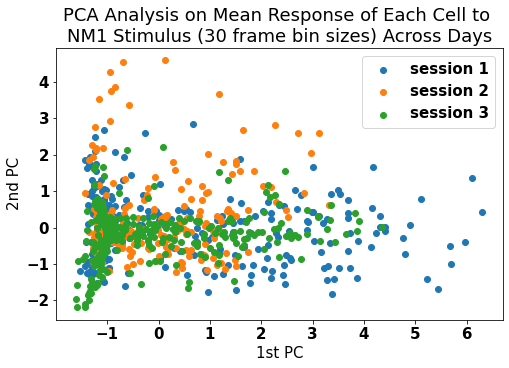

In [75]:
# PCA Model: 2D Visualization
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][0], transformed_data_pca[transformed_data_pca.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][0], transformed_data_pca[transformed_data_pca.Session=="2"][1], label="session 2")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="3"][0], transformed_data_pca[transformed_data_pca.Session=="3"][1], label="session 3")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM1 Stimulus (30 frame bin sizes) Across Days")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_one_pc12.jpg", dpi=200)
plt.show()


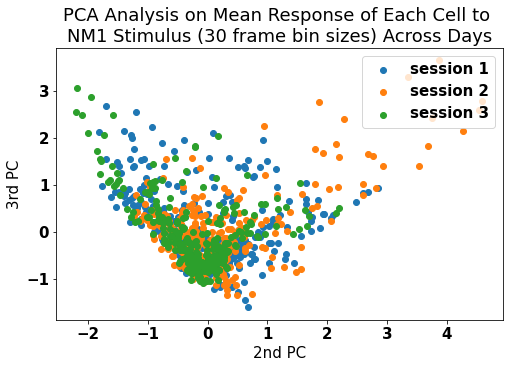

In [76]:
# PCA Model: 2D Visualization
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][1], transformed_data_pca[transformed_data_pca.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][1], transformed_data_pca[transformed_data_pca.Session=="2"][2], label="session 2")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="3"][1], transformed_data_pca[transformed_data_pca.Session=="3"][2], label="session 3")
ax.set_xlabel("2nd PC")
ax.set_ylabel("3rd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM1 Stimulus (30 frame bin sizes) Across Days")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_one_pc23.jpg", dpi=200)
plt.show()


In [77]:
# PCA Model: 3D Visualization
fig = px.scatter_3d(transformed_data_pca, x=0, y=1, z=2, color="Session", labels = {"0": "PC1","1": "PC2", "2": "PC3"}, title = "First 3 PCs on Mean Response of Each Cell to NM1 Stimulus (30 frame bin sizes) Across Days")
fig.update_traces(marker_size=3) # reduce size of scatter points from default size
fig.update_layout(width=800, height=600, font_size=11, scene_aspectmode="data", scene_camera_eye= dict(x=0.2, y=-2.0, z=1)) # adjust plot appearance
fig.show()

In [78]:
# Natural Movie 3 (two epochs)

In [79]:
mean_responses1, mean_responses2 = pcafunc.get_all_relevant_tables_movie_three(desired_container_id, 30, boc)

In [80]:
transformed_data_pca, pca_results_nm3 = pcafunc.pca_transform_data_movie_three(mean_responses1, mean_responses2, 3)

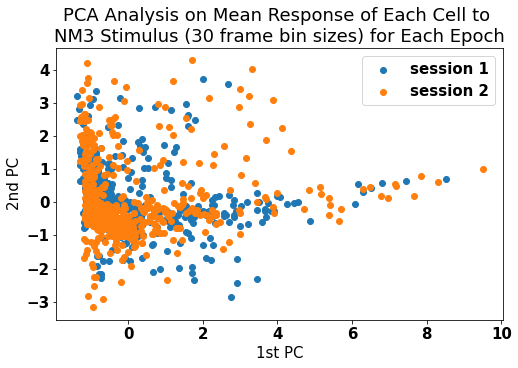

In [81]:
# PCA Model: 2D Visualization
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][0], transformed_data_pca[transformed_data_pca.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][0], transformed_data_pca[transformed_data_pca.Session=="2"][1], label="session 2")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM3 Stimulus (30 frame bin sizes) for Each Epoch")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_three_pc12.jpg", dpi=200)
plt.show()


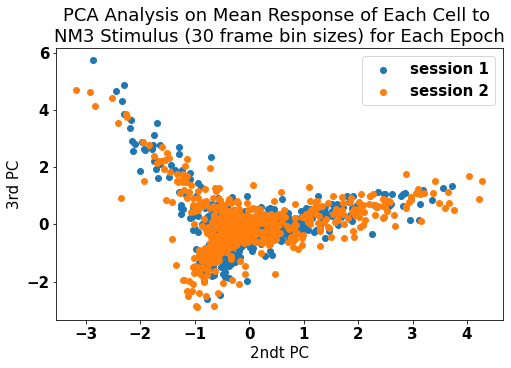

In [82]:
# PCA Model: 2D Visualization, PCs 1 and 3
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_pca[transformed_data_pca.Session=="1"][1], transformed_data_pca[transformed_data_pca.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_pca[transformed_data_pca.Session=="2"][1], transformed_data_pca[transformed_data_pca.Session=="2"][2], label="session 2")
ax.set_xlabel("2ndt PC")
ax.set_ylabel("3rd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM3 Stimulus (30 frame bin sizes) for Each Epoch")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_three_pc23.jpg", dpi=200)
plt.show()